# Generatives Trainig mit DeepHull loss, generatives und normales Netz trainieren unabhängig voneinander

In [1]:
import numpy as np
import torch

from script.NeuralNets.Networks import ICNN
from script.NeuralNets.Networks import SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.NeuralNets.trainFunction import train_icnn_adversarial, train_icnn
from script.eval import Plots_for

In [2]:
icnn = ICNN([2, 10, 10, 1])
adversarial = SequentialNN([2, 10, 10, 2])
epochs = 5
batch_size = 1

number_of_adversarial_samples = 1000
number_of_train_samples = 10000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

In [3]:
included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
true_extremal_points = Rhombus().get_extremal_points()
dataset = ConvexDataset(data=included_space)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data= ambient_space)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [4]:
random_samples = []
for i in range(number_of_adversarial_samples): # generate random samples
    x = np.random.default_rng().uniform(low=x_range[0], high=x_range[1])
    y = np.random.default_rng().uniform(low=y_range[0], high=y_range[1])
    random_samples.append([[x, y]])

value = torch.tensor(random_samples, requires_grad=True, dtype=torch.float64)
adversarial_set = ConvexDataset(data=value)
adversarial_loader = DataLoader(adversarial_set, batch_size=batch_size, shuffle=True)


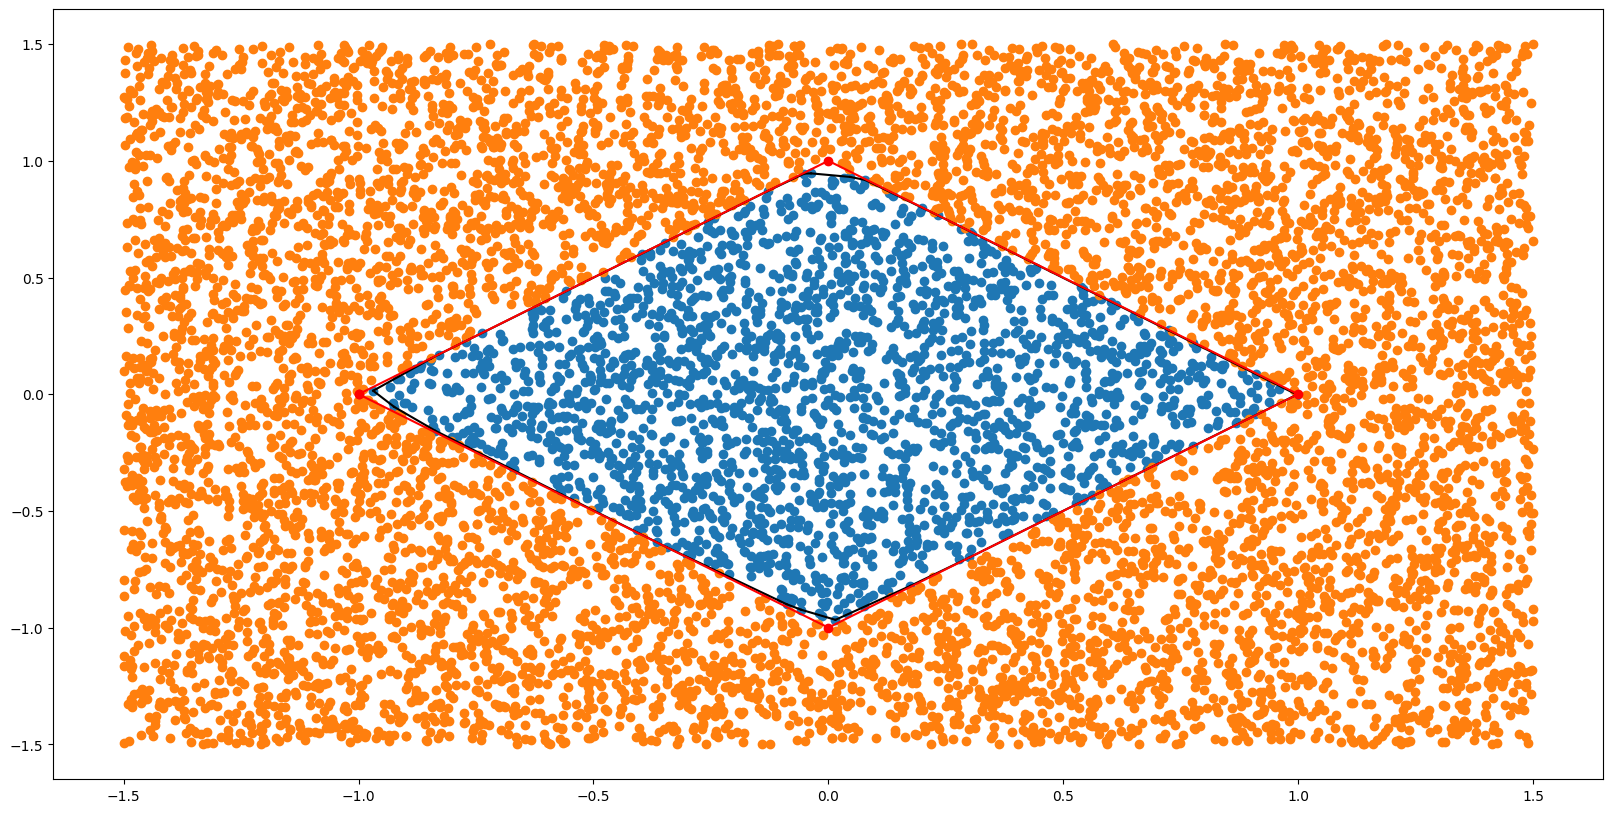

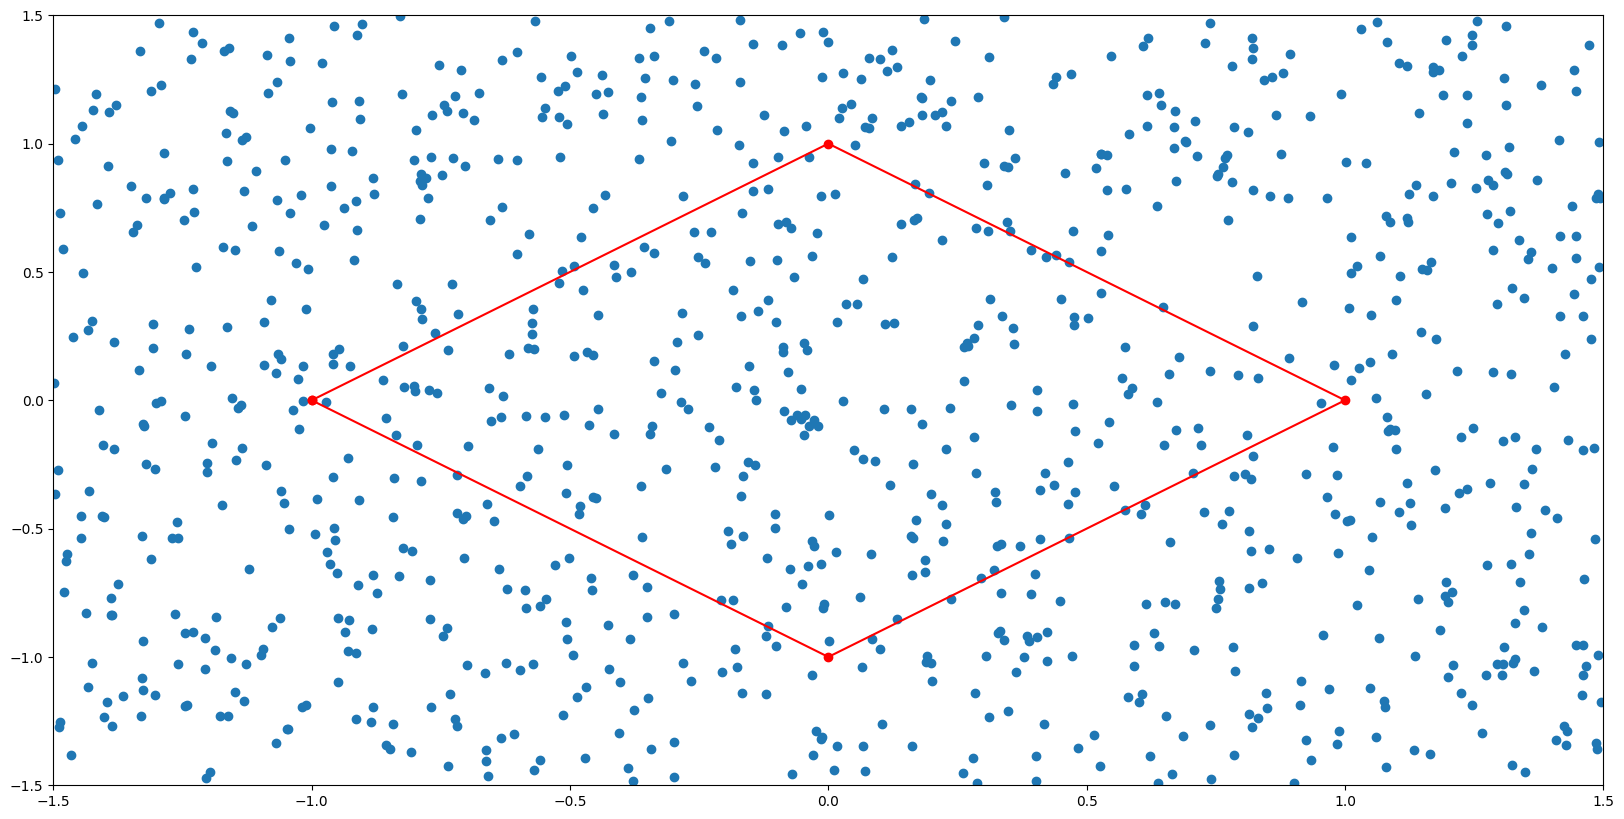

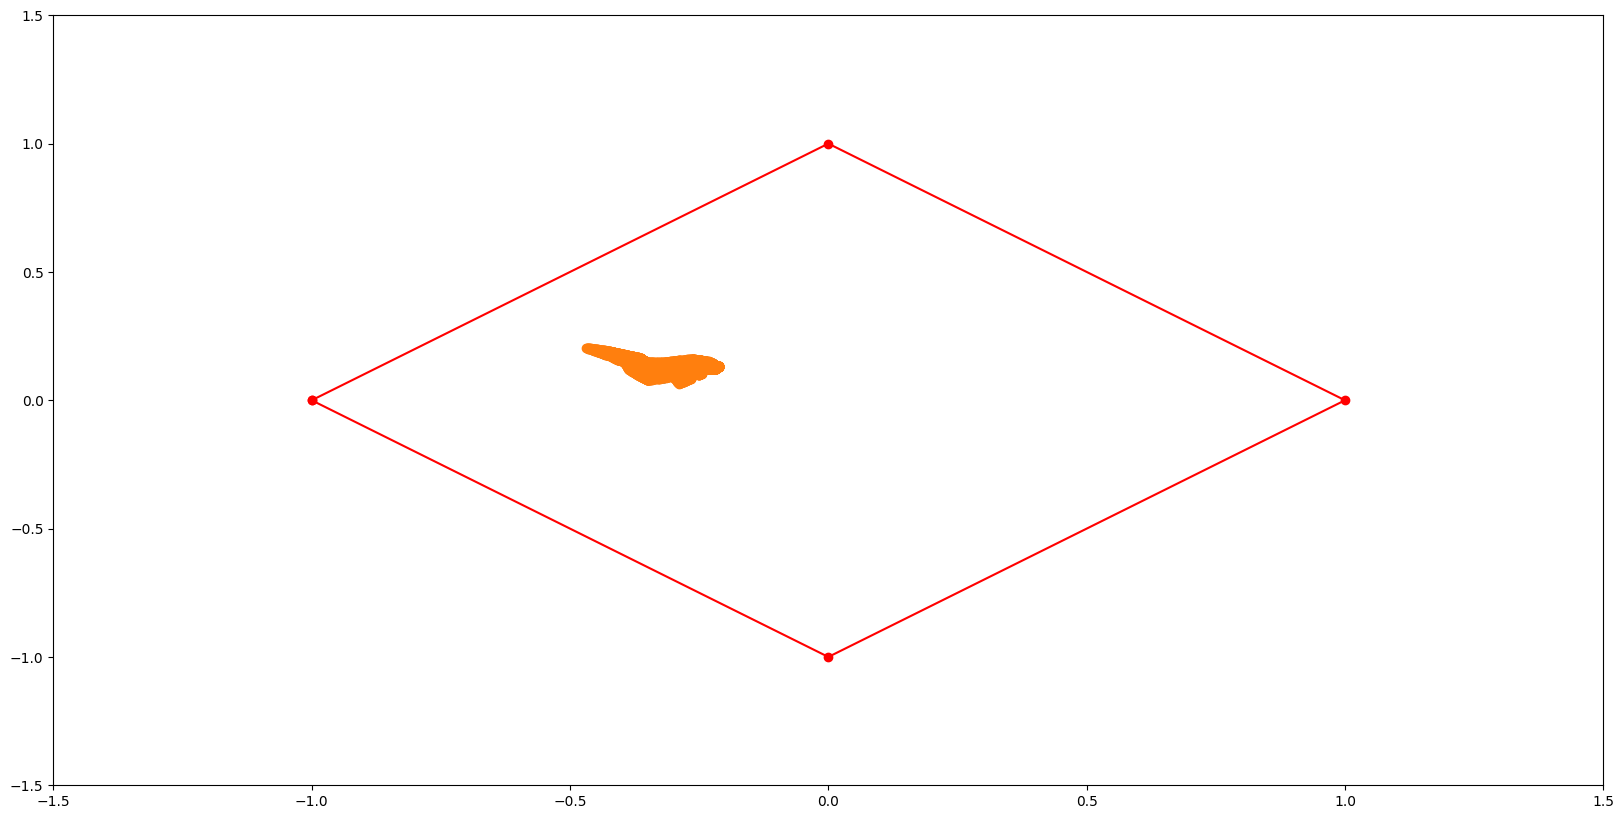

In [5]:
plots = Plots_for(0, icnn, included_space, ambient_space, true_extremal_points, x_range, y_range, adversarial=adversarial, adversarial_values=value)
plots.plt_initial()

plots.plt_adversarial_initial()
plots.plt_adversarial_dotted()


=== Epoch: 0===
batch = 0, mean loss = 0.03223704761976115
batch = 100, mean loss = 0.12638311696139012
batch = 200, mean loss = 0.14694159929594247
batch = 300, mean loss = 0.14170381554886496
batch = 400, mean loss = 0.1353690047935956
batch = 500, mean loss = 0.14131826676266532
batch = 600, mean loss = 0.14122329383911367
batch = 700, mean loss = 0.1350162276359225
batch = 800, mean loss = 0.1333092001774335
batch = 900, mean loss = 0.1301280784408314
batch = 1000, mean loss = 0.12738867216472474
batch = 1100, mean loss = 0.12551239763519456
batch = 1200, mean loss = 0.12611723013809809
batch = 1300, mean loss = 0.12323416941044327
batch = 1400, mean loss = 0.12453514146185998
batch = 1500, mean loss = 0.12470273551441526
batch = 1600, mean loss = 0.12335321117590073
batch = 1700, mean loss = 0.12637487295815725
batch = 1800, mean loss = 0.12547327839636077
batch = 1900, mean loss = 0.12505576043973177
batch = 2000, mean loss = 0.12530603330567466
batch = 2100, mean loss = 0.123778

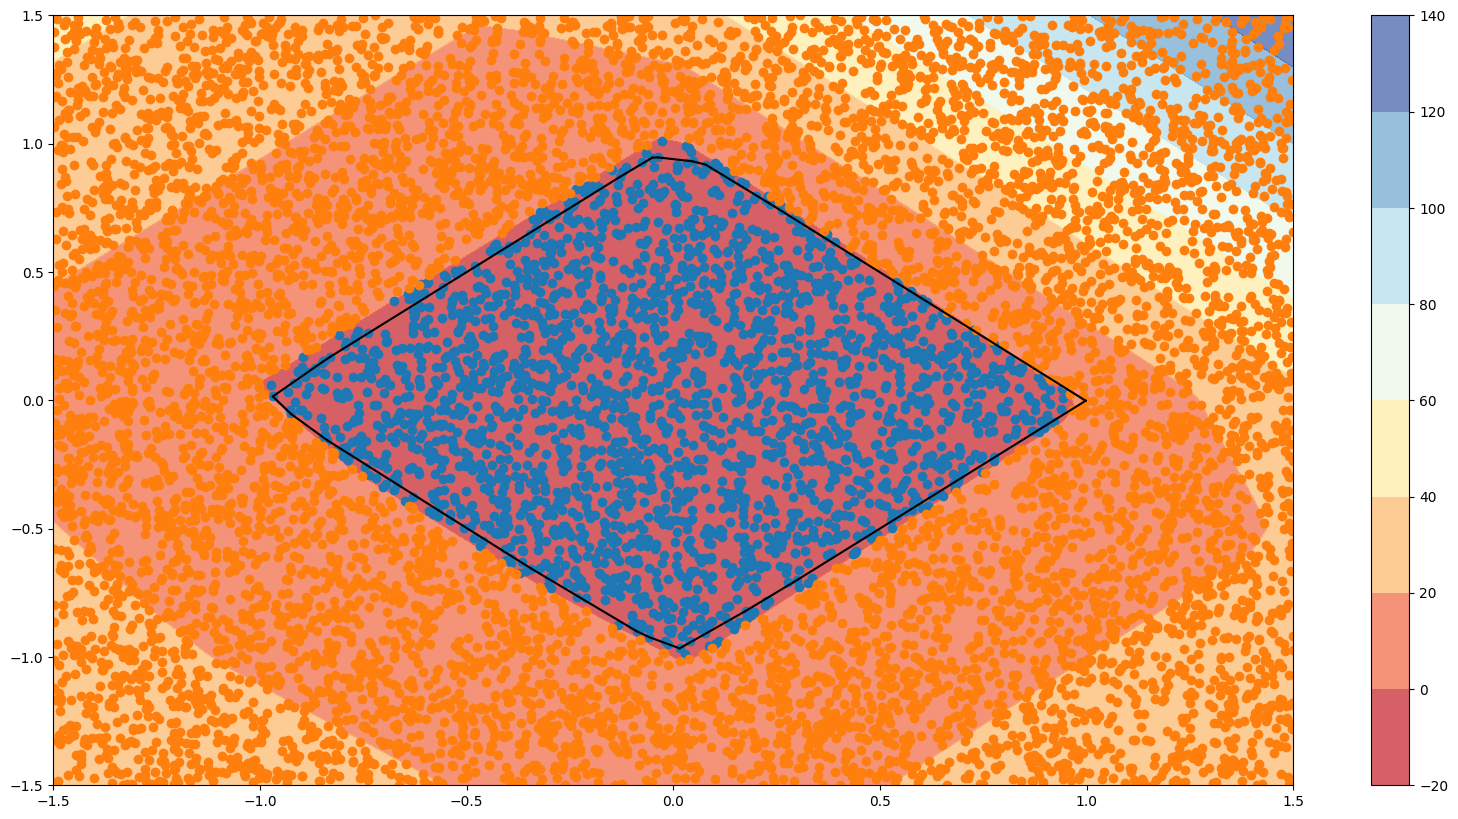

In [7]:
history = train_icnn(icnn, train_loader, ambient_loader, epochs=epochs, hyper_lambda=hyper_lambda)
plots.plt_mesh()

In [8]:
history = train_icnn_adversarial(icnn, adversarial, train_loader, adversarial_loader, epochs=epochs, train_ICNN=False, hyper_lambda=hyper_lambda)

=== Epoch: 0===
batch = 0, mean loss = 4.559853284089312, l_pos = 0.009350159077143502, l_neg = 4.53982788120668, l_gen = 0.010675243805487795
batch = 100, mean loss = 3.953302452475228, l_pos = 0.05309851184922004, l_neg = 3.8330574524255647, l_gen = 0.06714648820044257
batch = 200, mean loss = 2.5774614712292134, l_pos = 0.04323353550934466, l_neg = 2.072429001842523, l_gen = 0.4617989338773421
batch = 300, mean loss = 2.0740581482909937, l_pos = 0.049067998812580234, l_neg = 1.3905105403457525, l_gen = 0.6344796091326582
batch = 400, mean loss = 1.8143036963805559, l_pos = 0.044849203741954294, l_neg = 1.0460915737028667, l_gen = 0.7233629189357336
batch = 500, mean loss = 1.6587133313382956, l_pos = 0.04278383593089124, l_neg = 0.839104619851262, l_gen = 0.7768248755561404
batch = 600, mean loss = 1.5554121970304358, l_pos = 0.04194716627414826, l_neg = 0.7003970353773027, l_gen = 0.8130679953789832
batch = 700, mean loss = 1.4804295024330398, l_pos = 0.0401506994311896, l_neg = 0.

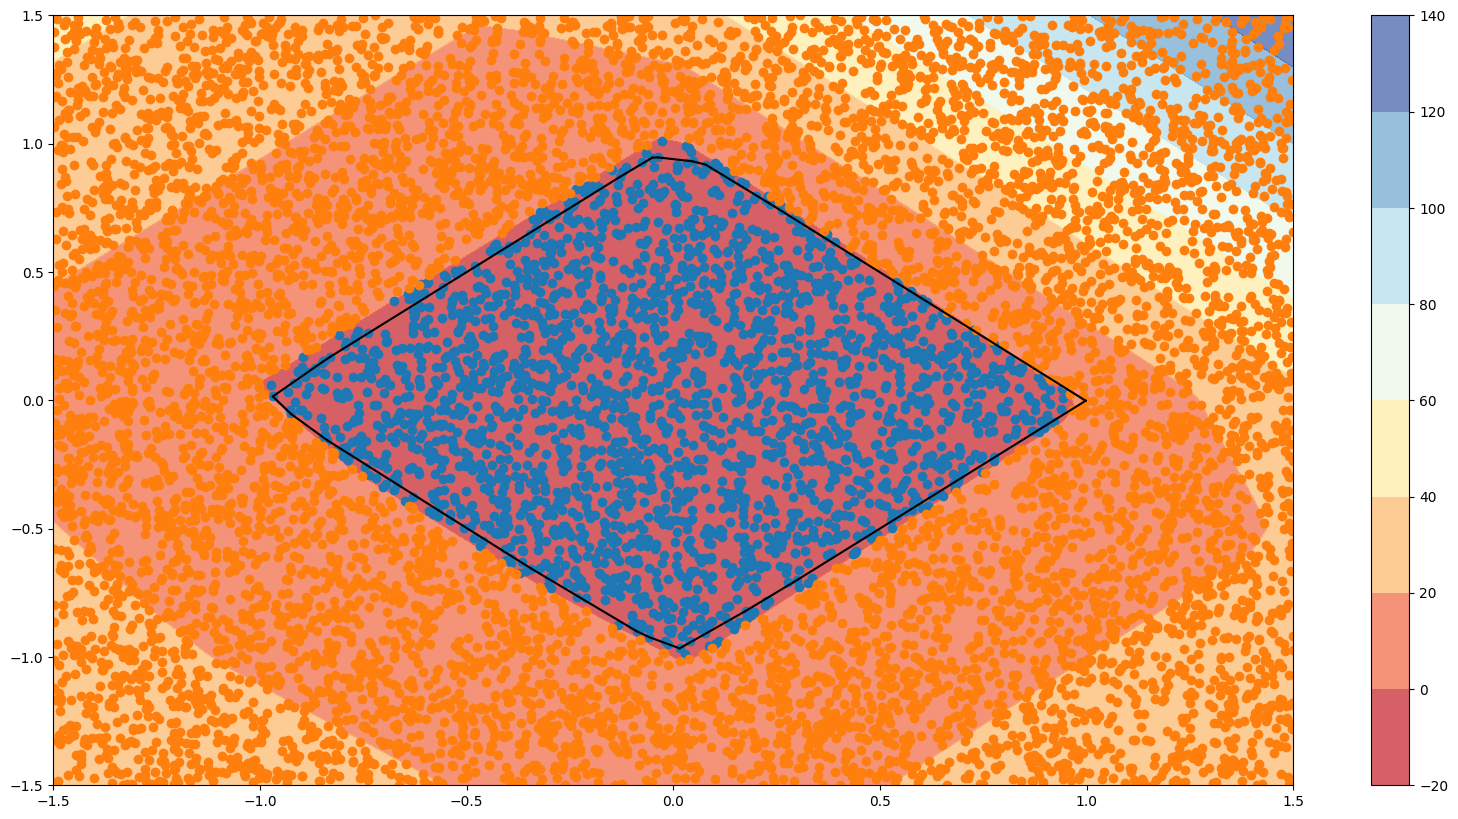

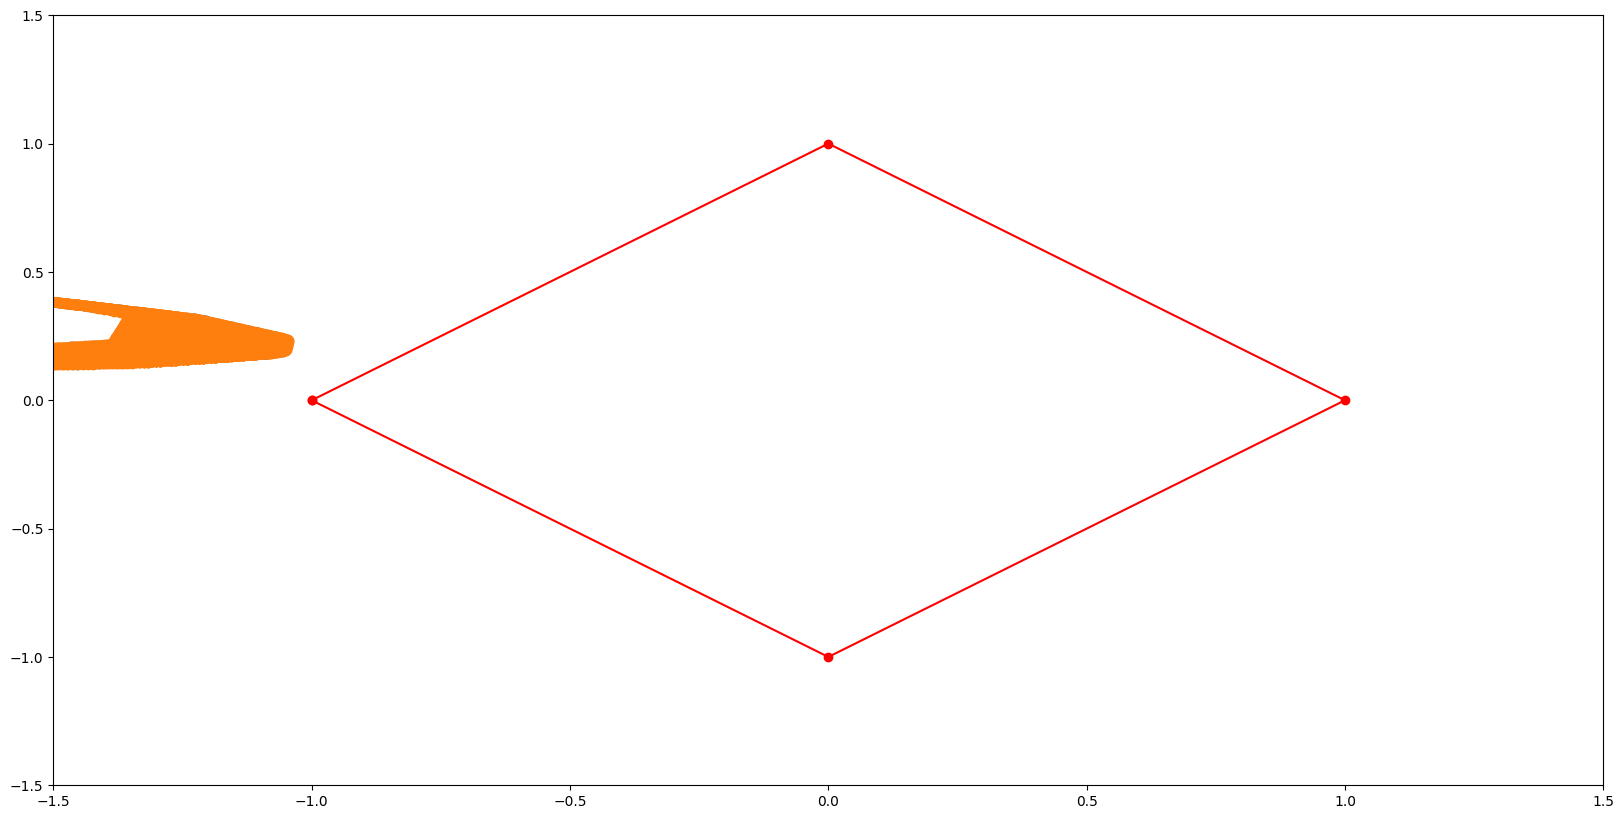

In [9]:
plots.plt_mesh()
plots.plt_adversarial_dotted()